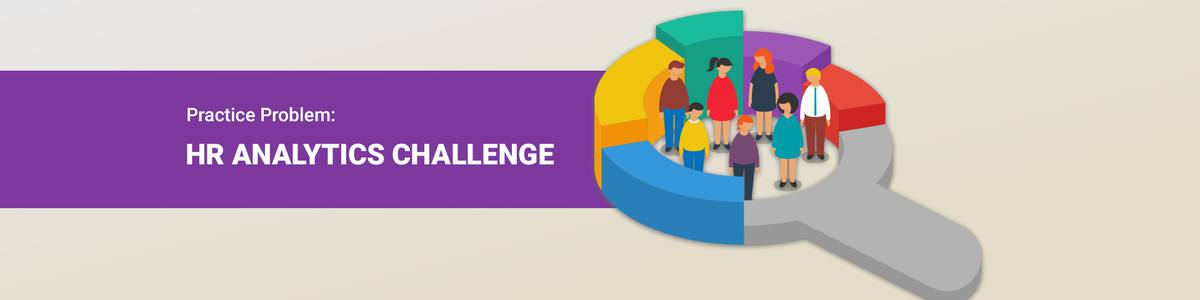

# Objective  - HR Analytics

# Exploratory Data Analysis (EDA)

# 1. Load Python Modules

In [1]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
file_path=r"HR Analytics_Dataset.csv"
hr_df=pd.read_csv(file_path)
hr_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
#drop - sensitive - non imp columns for data analysis 
print(hr_df["employee_id"].nunique())
hr_df.drop("employee_id",axis=1,inplace=True)
# print columns names
print(hr_df.columns)

54808
Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


# 3. Basic Inspection on given dataset

In [4]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(hr_df)

top 5 rows - using head
          department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1     

**Observations**

- HR Dataset is a machine learning classification task.
- is_promoted  is the target column and did not have any null values.
- We have 12 Independent Variables, with 5 as categorical and the rest are numerical.
- Observed missing values in education in Categorical Columns.
- Observed missing values in previous_year_rating  in Numerical Columns.
- We have a total of 54808 records/samples/observations.


# 4. Handling Missing Values - Categorical - Variables

- Missing Values in Categorical Columns - Replaced with Mode

In [5]:
def print_cat_values(df,cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",df[cat_var].unique())
    print("num of categories:",df[cat_var].nunique())
    print("Value-counts:", df[cat_var].value_counts())  

In [6]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['education']

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [7]:
for var in cat_vars:
    print_cat_values(hr_df,var)
    print("=========================================")
    print()

We are studying about varailbe/column/feature : education
categories: ["Master's & above" "Bachelor's" nan 'Below Secondary']
num of categories: 3
Value-counts: education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64



In [8]:
for var in cat_vars:
    mode = hr_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    hr_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

- Categorical Uni Variate Analysis
- Frequency Table
- Relative Frequency Table
- Bar Chart
- Pi Chart

In [9]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

department frequency table
+---+-------------------+-----------+
|   |       Class       | Frequency |
+---+-------------------+-----------+
| 0 | Sales & Marketing |   16840   |
| 1 |    Operations     |   11348   |
| 2 |    Technology     |   7138    |
| 3 |    Procurement    |   7138    |
| 4 |     Analytics     |   5352    |
| 5 |      Finance      |   2536    |
| 6 |        HR         |   2418    |
| 7 |       Legal       |   1039    |
| 8 |        R&D        |    999    |
+---+-------------------+-----------+
department Relative frequency table
+---+-------------------+-----------+----------------------+
|   |       Class       | Frequency | Relative Frequency % |
+---+-------------------+-----------+----------------------+
| 0 | Sales & Marketing |   16840   |        30.73         |
| 1 |    Operations     |   11348   |        20.71         |
| 2 |    Technology     |   7138    |        13.02         |
| 3 |    Procurement    |   7138    |        13.02         |
| 4 |     Analyt

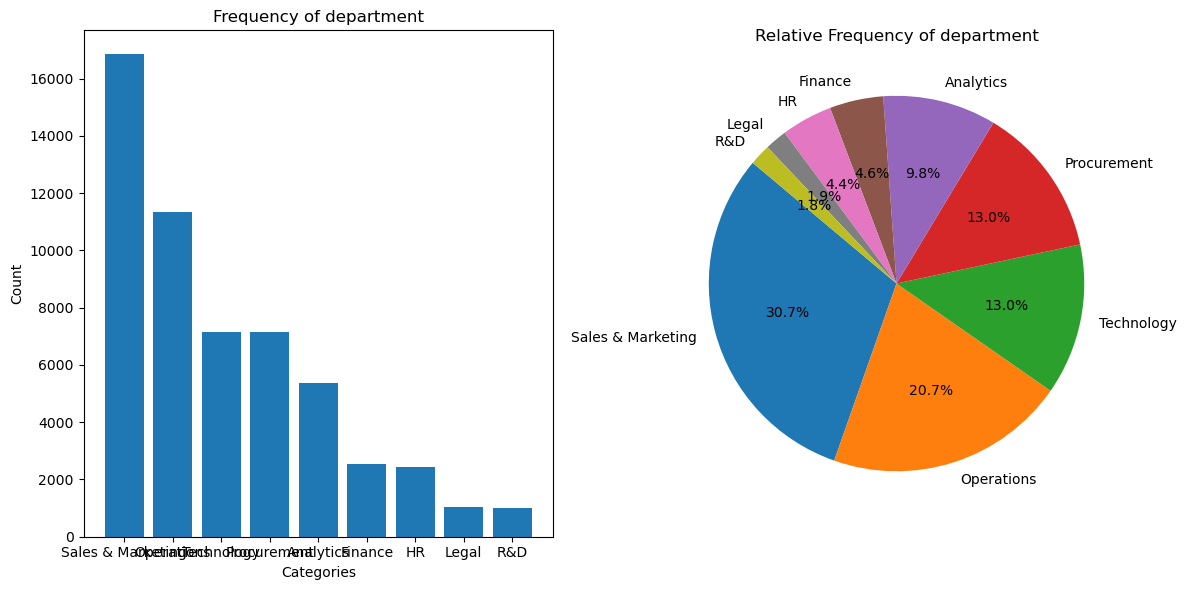

region frequency table
+----+-----------+-----------+
|    |   Class   | Frequency |
+----+-----------+-----------+
| 0  | region_2  |   12343   |
| 1  | region_22 |   6428    |
| 2  | region_7  |   4843    |
| 3  | region_15 |   2808    |
| 4  | region_13 |   2648    |
| 5  | region_26 |   2260    |
| 6  | region_31 |   1935    |
| 7  | region_4  |   1703    |
| 8  | region_27 |   1659    |
| 9  | region_16 |   1465    |
| 10 | region_28 |   1318    |
| 11 | region_11 |   1315    |
| 12 | region_23 |   1175    |
| 13 | region_29 |    994    |
| 14 | region_32 |    945    |
| 15 | region_19 |    874    |
| 16 | region_20 |    850    |
| 17 | region_14 |    827    |
| 18 | region_25 |    819    |
| 19 | region_17 |    796    |
| 20 | region_5  |    766    |
| 21 | region_6  |    690    |
| 22 | region_30 |    657    |
| 23 | region_8  |    655    |
| 24 | region_10 |    648    |
| 25 | region_1  |    610    |
| 26 | region_24 |    508    |
| 27 | region_12 |    500    |
| 28 | region_9 

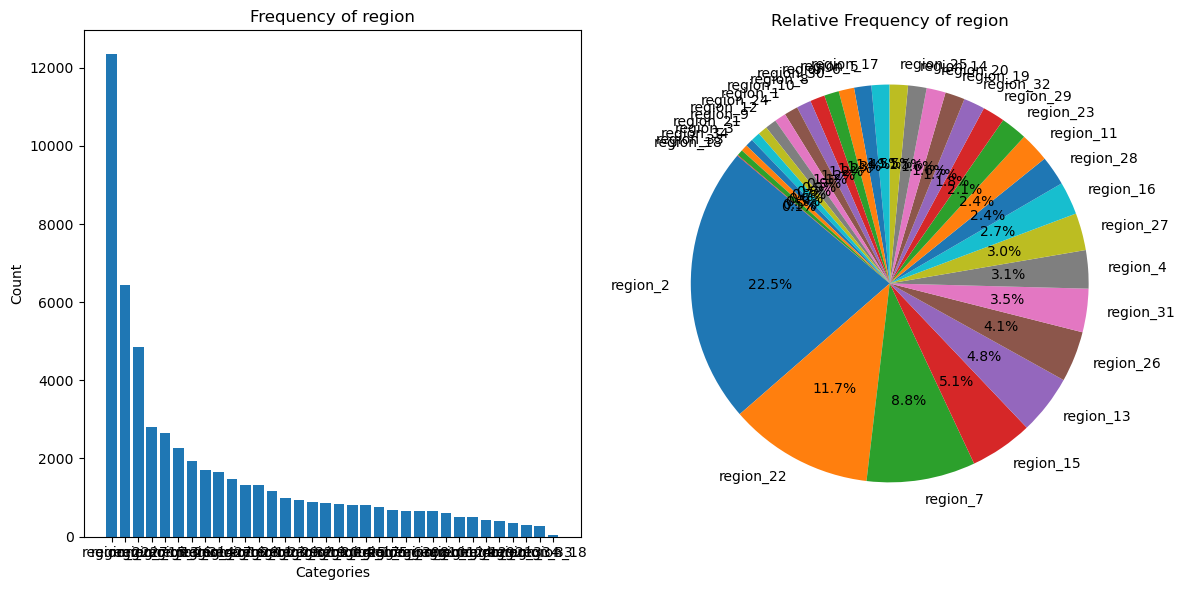

education frequency table
+---+------------------+-----------+
|   |      Class       | Frequency |
+---+------------------+-----------+
| 0 |    Bachelor's    |   39078   |
| 1 | Master's & above |   14925   |
| 2 | Below Secondary  |    805    |
+---+------------------+-----------+
education Relative frequency table
+---+------------------+-----------+----------------------+
|   |      Class       | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |    Bachelor's    |   39078   |         71.3         |
| 1 | Master's & above |   14925   |        27.23         |
| 2 | Below Secondary  |    805    |         1.47         |
+---+------------------+-----------+----------------------+


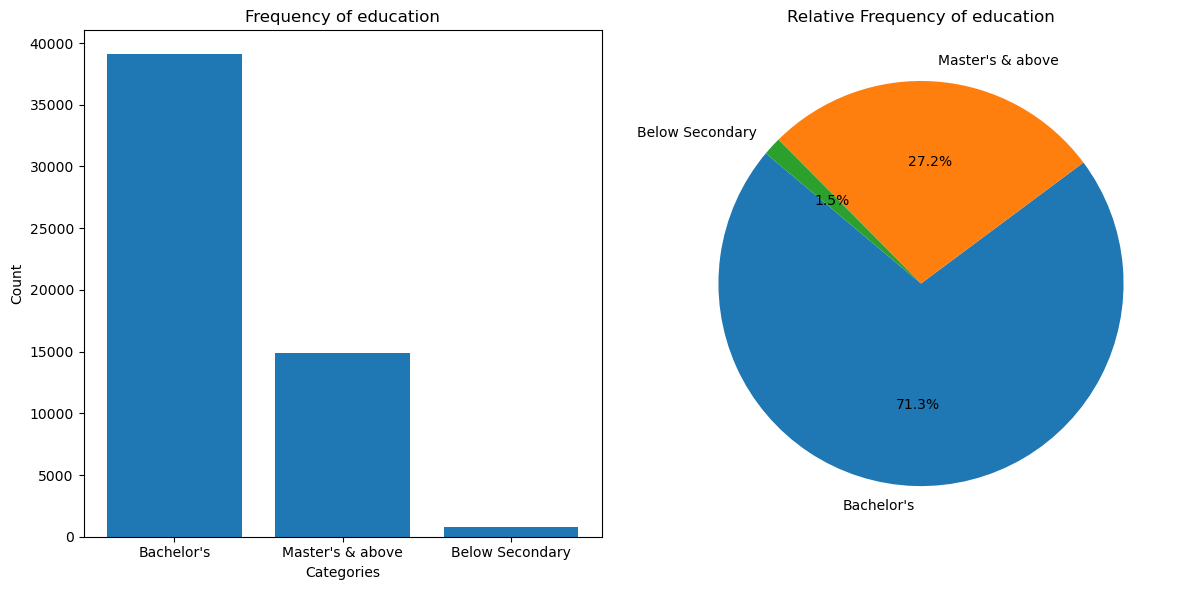

gender frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   m   |   38496   |
| 1 |   f   |   16312   |
+---+-------+-----------+
gender Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   m   |   38496   |        70.24         |
| 1 |   f   |   16312   |        29.76         |
+---+-------+-----------+----------------------+


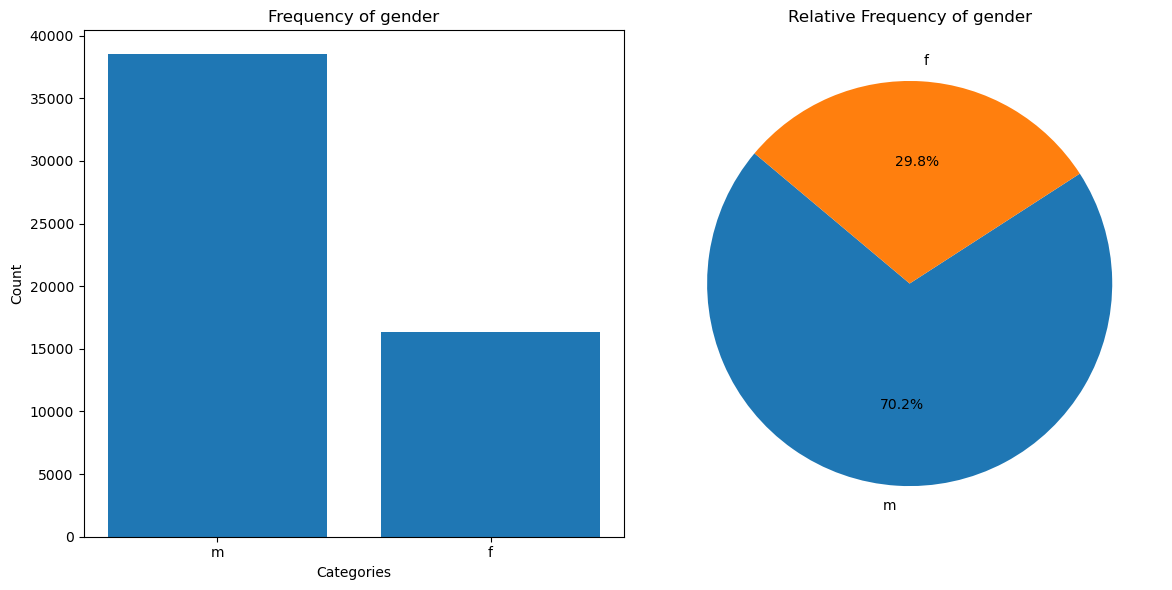

recruitment_channel frequency table
+---+----------+-----------+
|   |  Class   | Frequency |
+---+----------+-----------+
| 0 |  other   |   30446   |
| 1 | sourcing |   23220   |
| 2 | referred |   1142    |
+---+----------+-----------+
recruitment_channel Relative frequency table
+---+----------+-----------+----------------------+
|   |  Class   | Frequency | Relative Frequency % |
+---+----------+-----------+----------------------+
| 0 |  other   |   30446   |        55.55         |
| 1 | sourcing |   23220   |        42.37         |
| 2 | referred |   1142    |         2.08         |
+---+----------+-----------+----------------------+


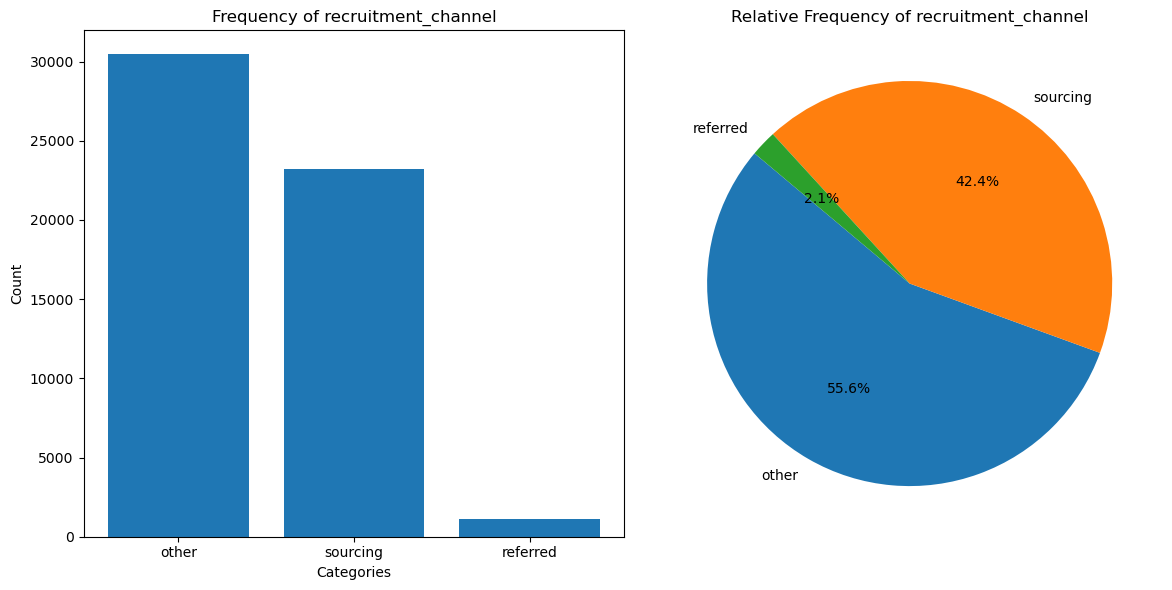

In [10]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(hr_df)

**Observations**





# 6. Handling Missing Values in Numerical Columns

- Handling the Missing Values in Numerical Columns by median

In [11]:
hr_df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
hr_df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
for var in ["previous_year_rating"]:
    median = hr_df[var].median()
    #print(median)

    # fill the missing value with mode
    hr_df[var].fillna(median,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

- Numerical Uni Variate Analysis
- Frequency Interval Data Distribution
- Box Plot
- Histogram with KDE
- Histogram

In [14]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        
        

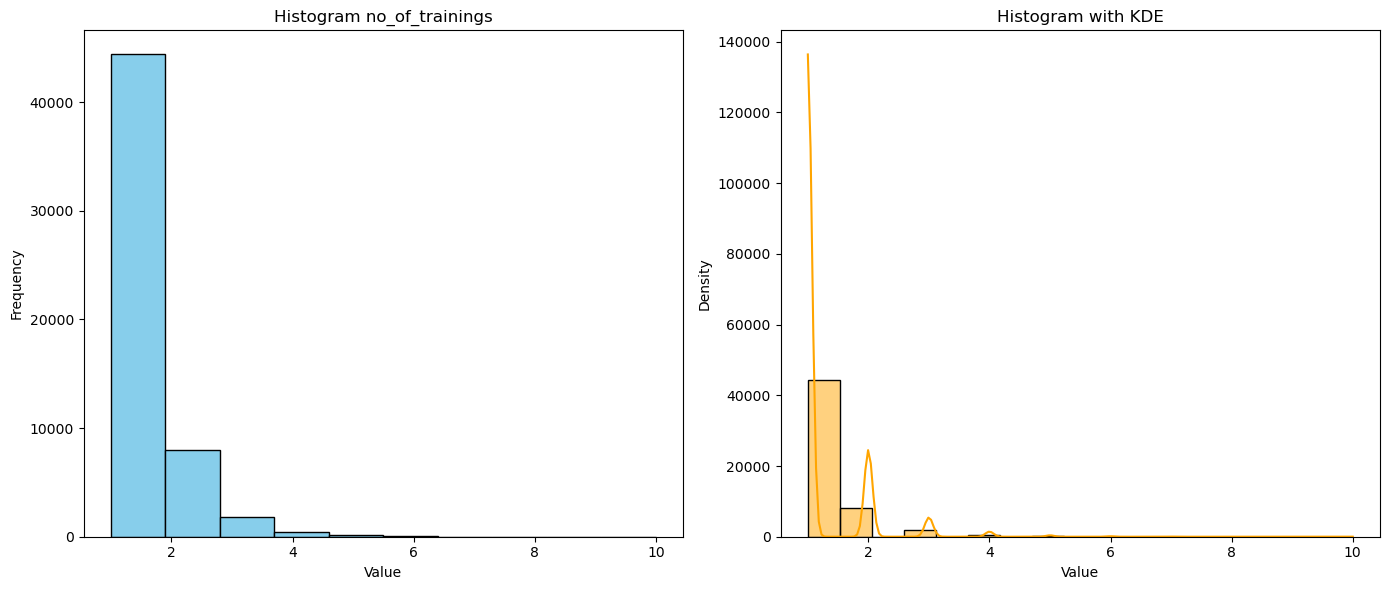

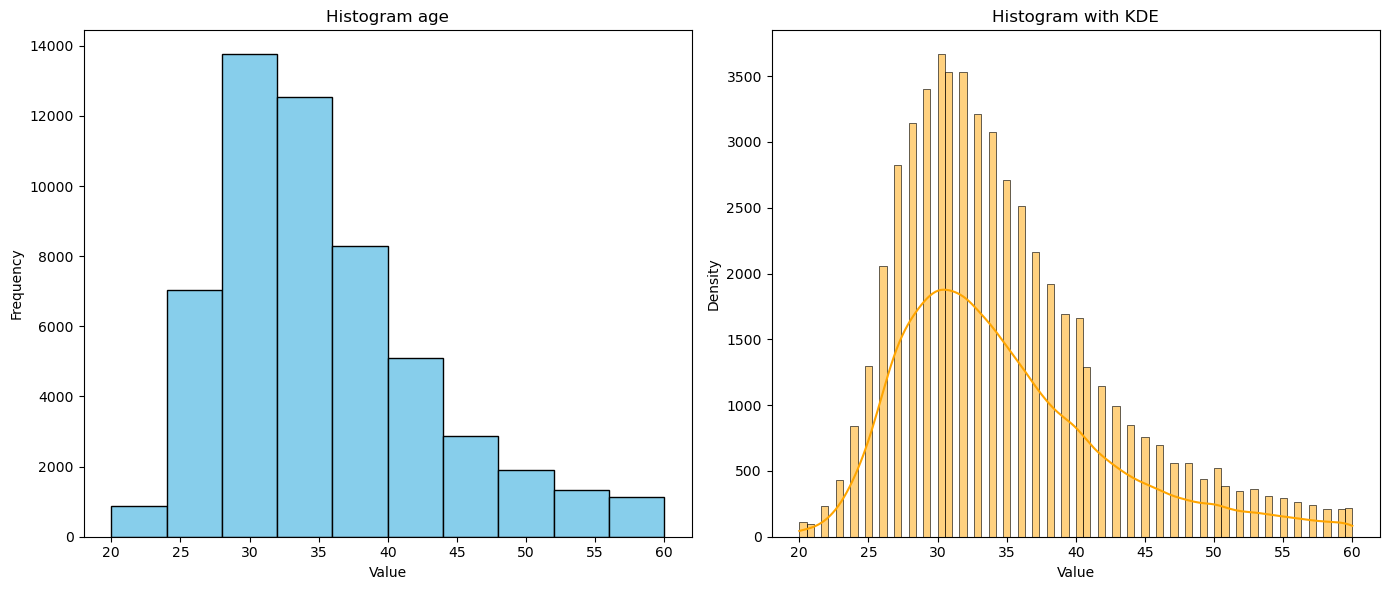

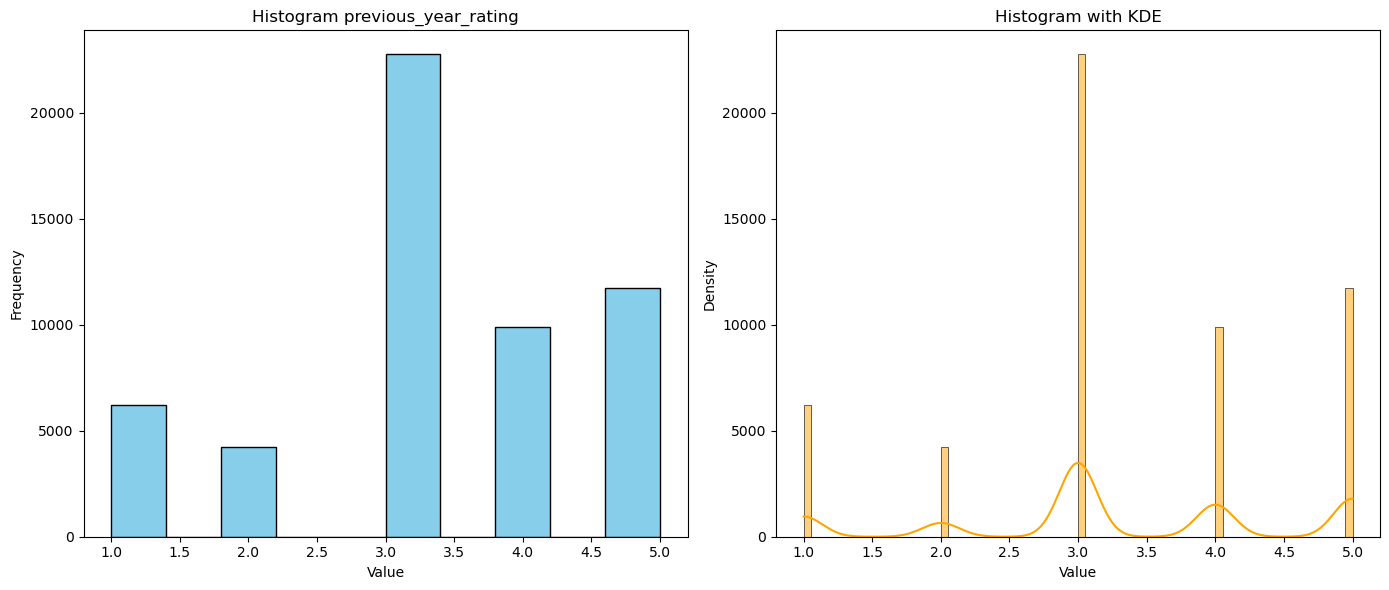

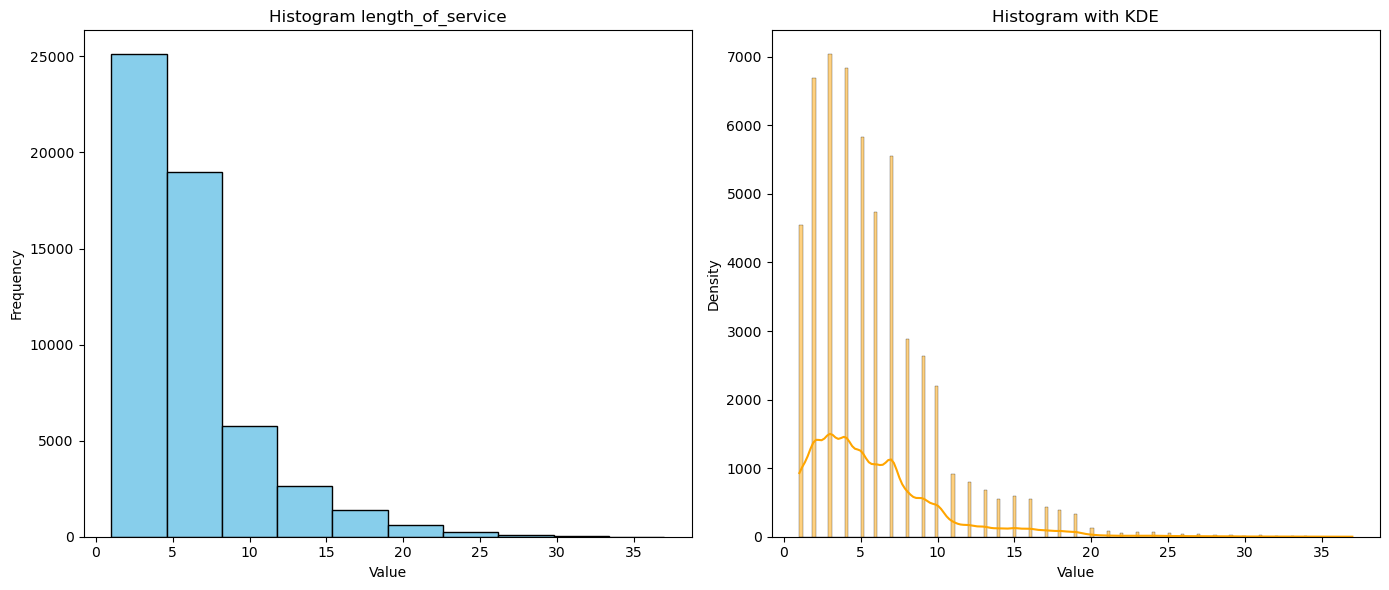

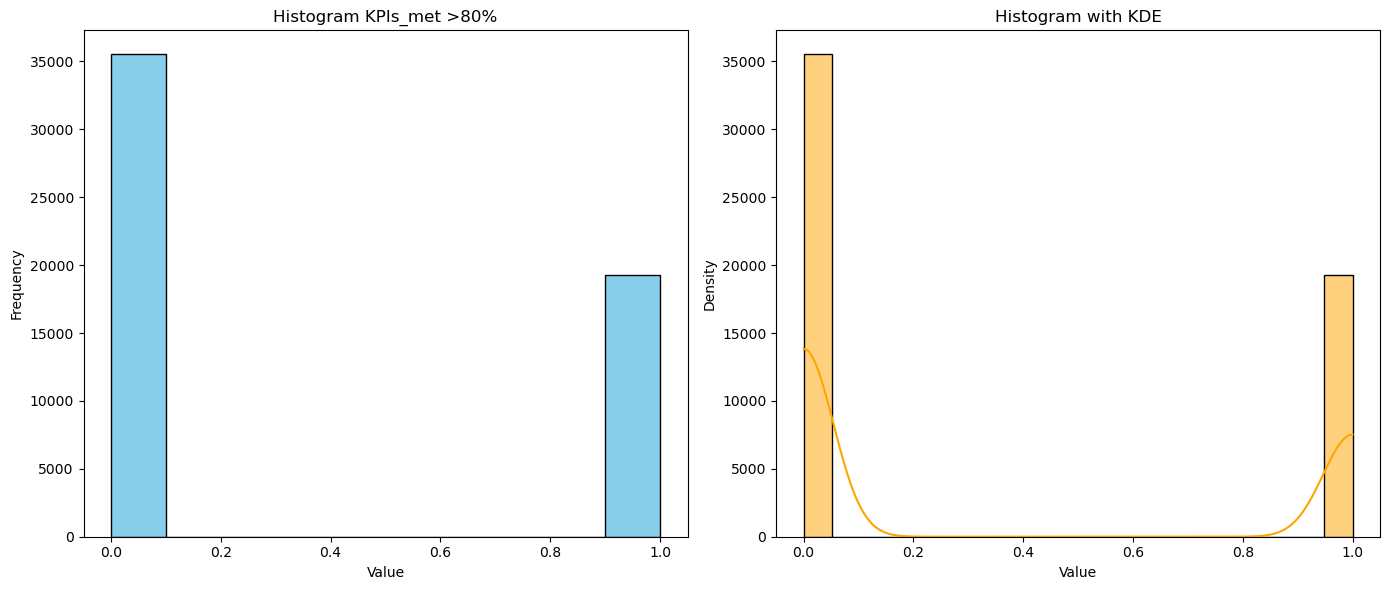

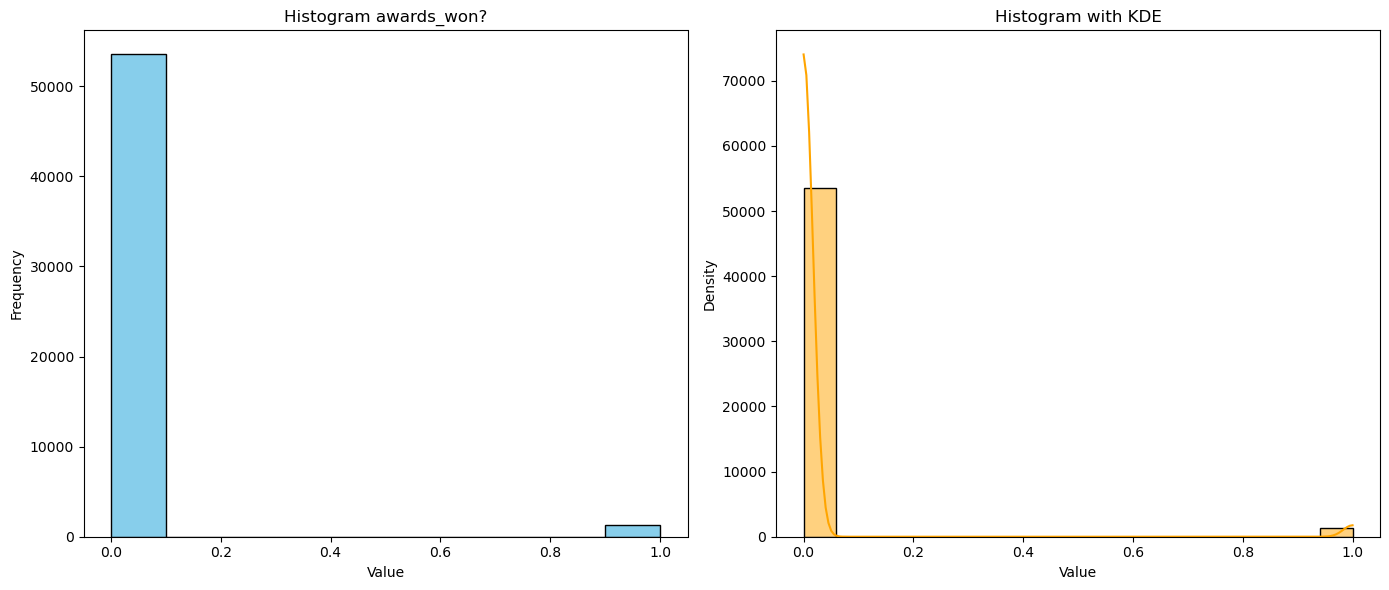

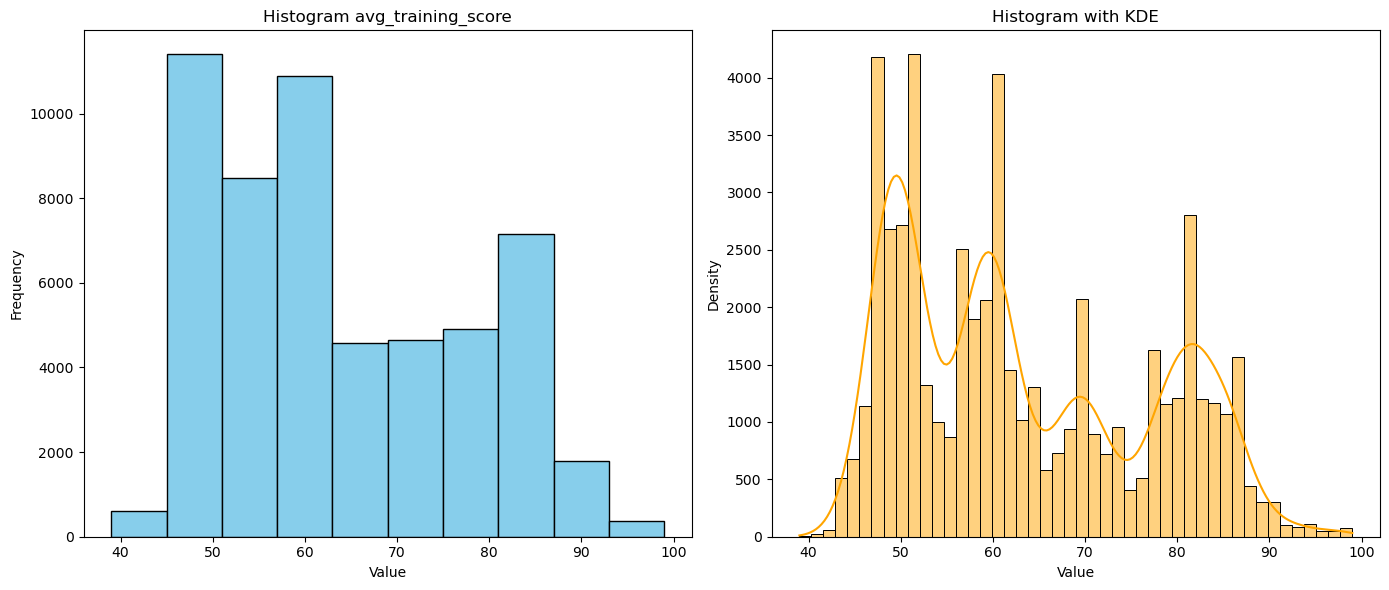

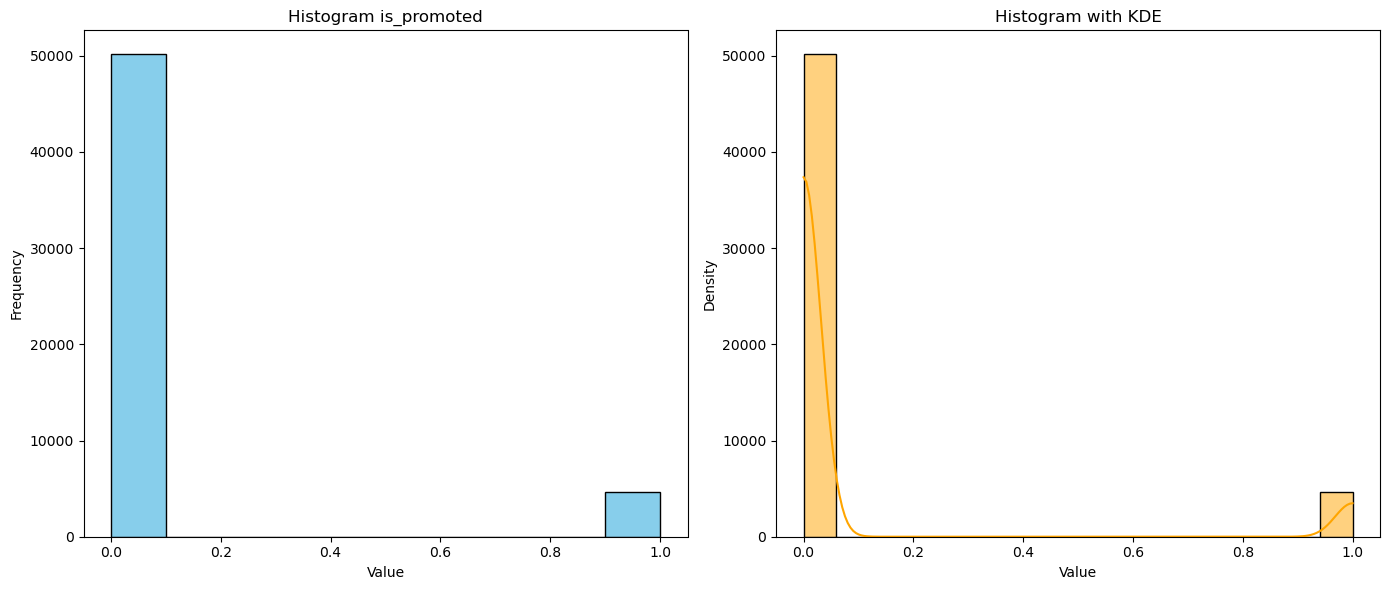

In [15]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_df)

**Observations**

- is_promoted, awards_won,kpi_met - we can tranform to cat
- it is imbalanced dataset


In [16]:
# Convert numerical column to categorical column
hr_df['is_promoted_cat'] = hr_df['is_promoted'].map({1: 'Yes', 0: 'No'})
hr_df['awards_won_cat'] = hr_df['awards_won?'].map({1: 'Yes', 0: 'No'})
hr_df['KPIs_met_cat'] = hr_df['KPIs_met >80%'].map({1: 'Yes', 0: 'No'})

In [17]:
hr_df.drop("is_promoted",axis=1,inplace=True)
hr_df.drop("awards_won?",axis=1,inplace=True)
hr_df.drop("KPIs_met >80%",axis=1,inplace=True)

# 8. Numerical - Variables -Outliers Analysis - fillit

- Fill the outliers in Numericals cols with median

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [18]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat']

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'is_promoted_cat', 'awards_won_cat', 'KPIs_met_cat'],
      dtype='object')


is_promoted_cat       No   Yes
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768
is_promoted_cat     No  Yes
region                     
region_1           552   58
region_10          597   51
region_11         1241   74
region_12          467   33
region_13         2418  230
region_14          765   62
region_15         2586  222
region_16         1363  102
region_17          687  109
region_18           30    1
region_19          821   53
region_2         11354  989
region_20          801   49
region_21          393   18
region_22         5694  734
region_23         1038  137
region_24          490   18
region_25          716  103
region_26         2117  143
region_27         1528  131
region_28         1164  154
region_29      

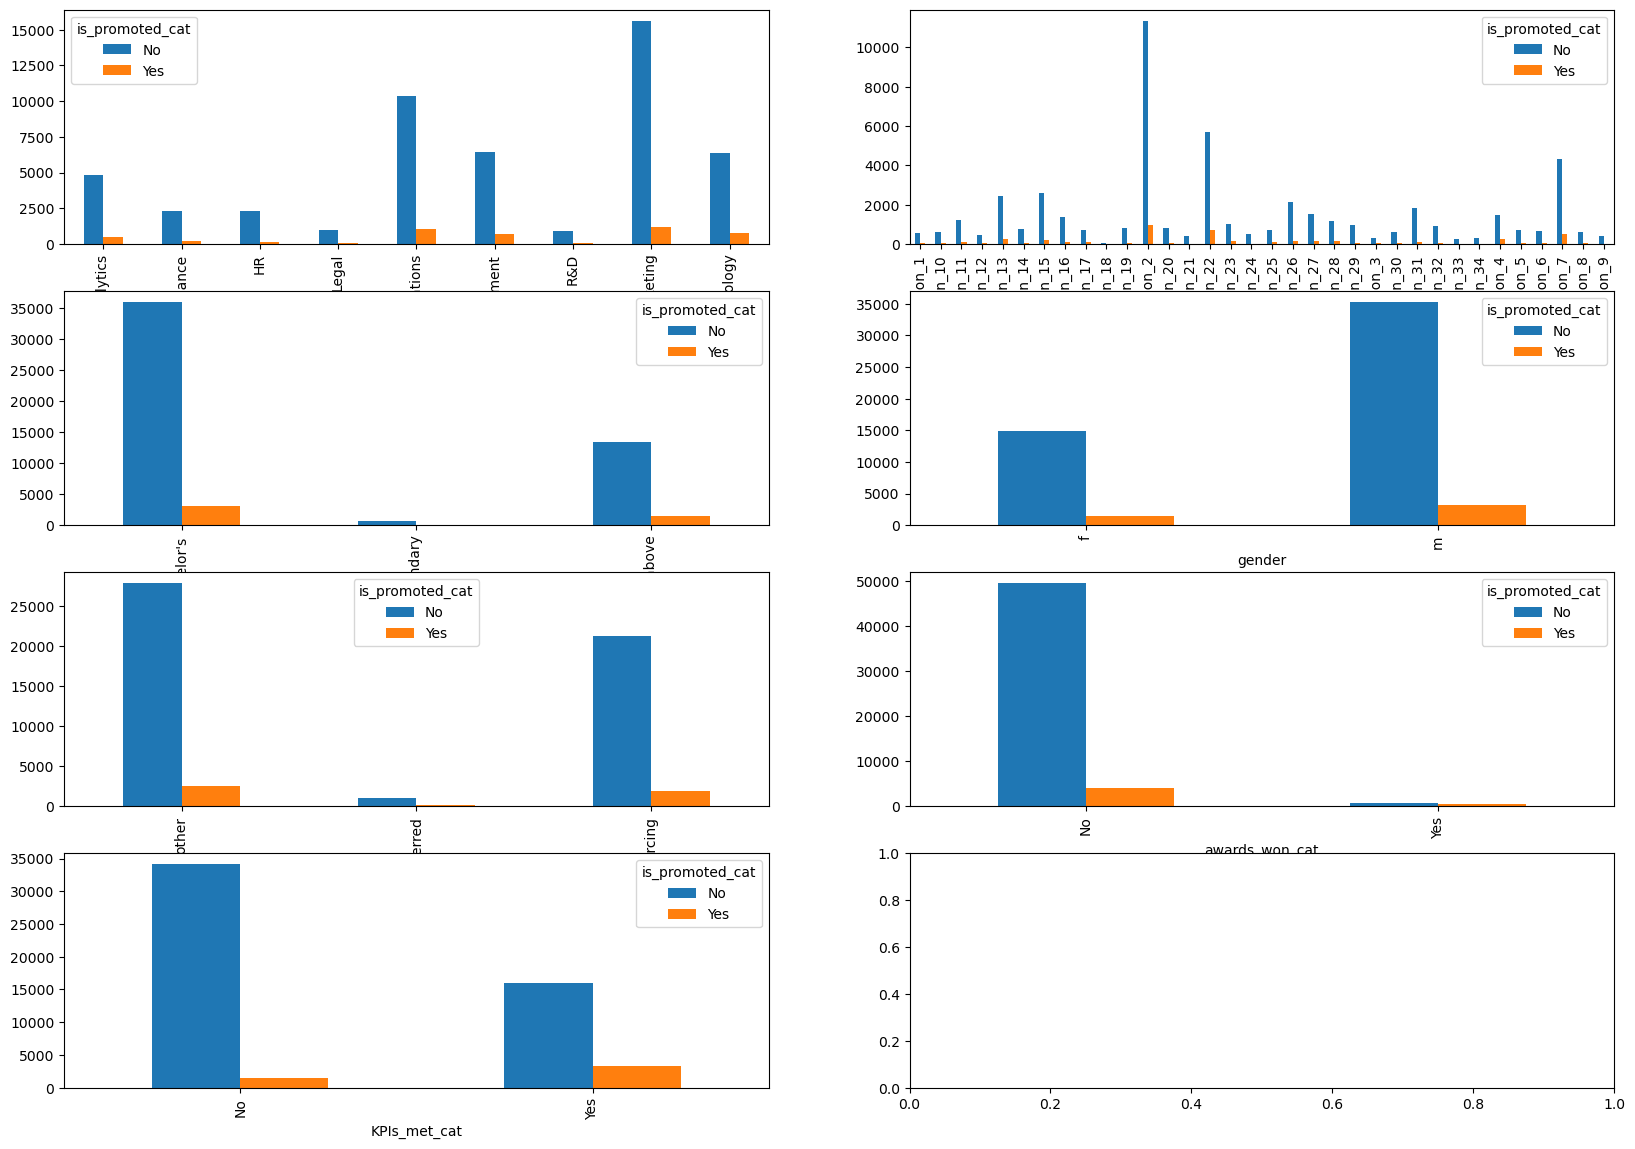

In [19]:
target="is_promoted_cat"
fig,ax = plt.subplots(4,2,figsize=(20,14))
for axi,x in zip(ax.flat,cat_vars):
    col1=hr_df[x]
    col2=hr_df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)


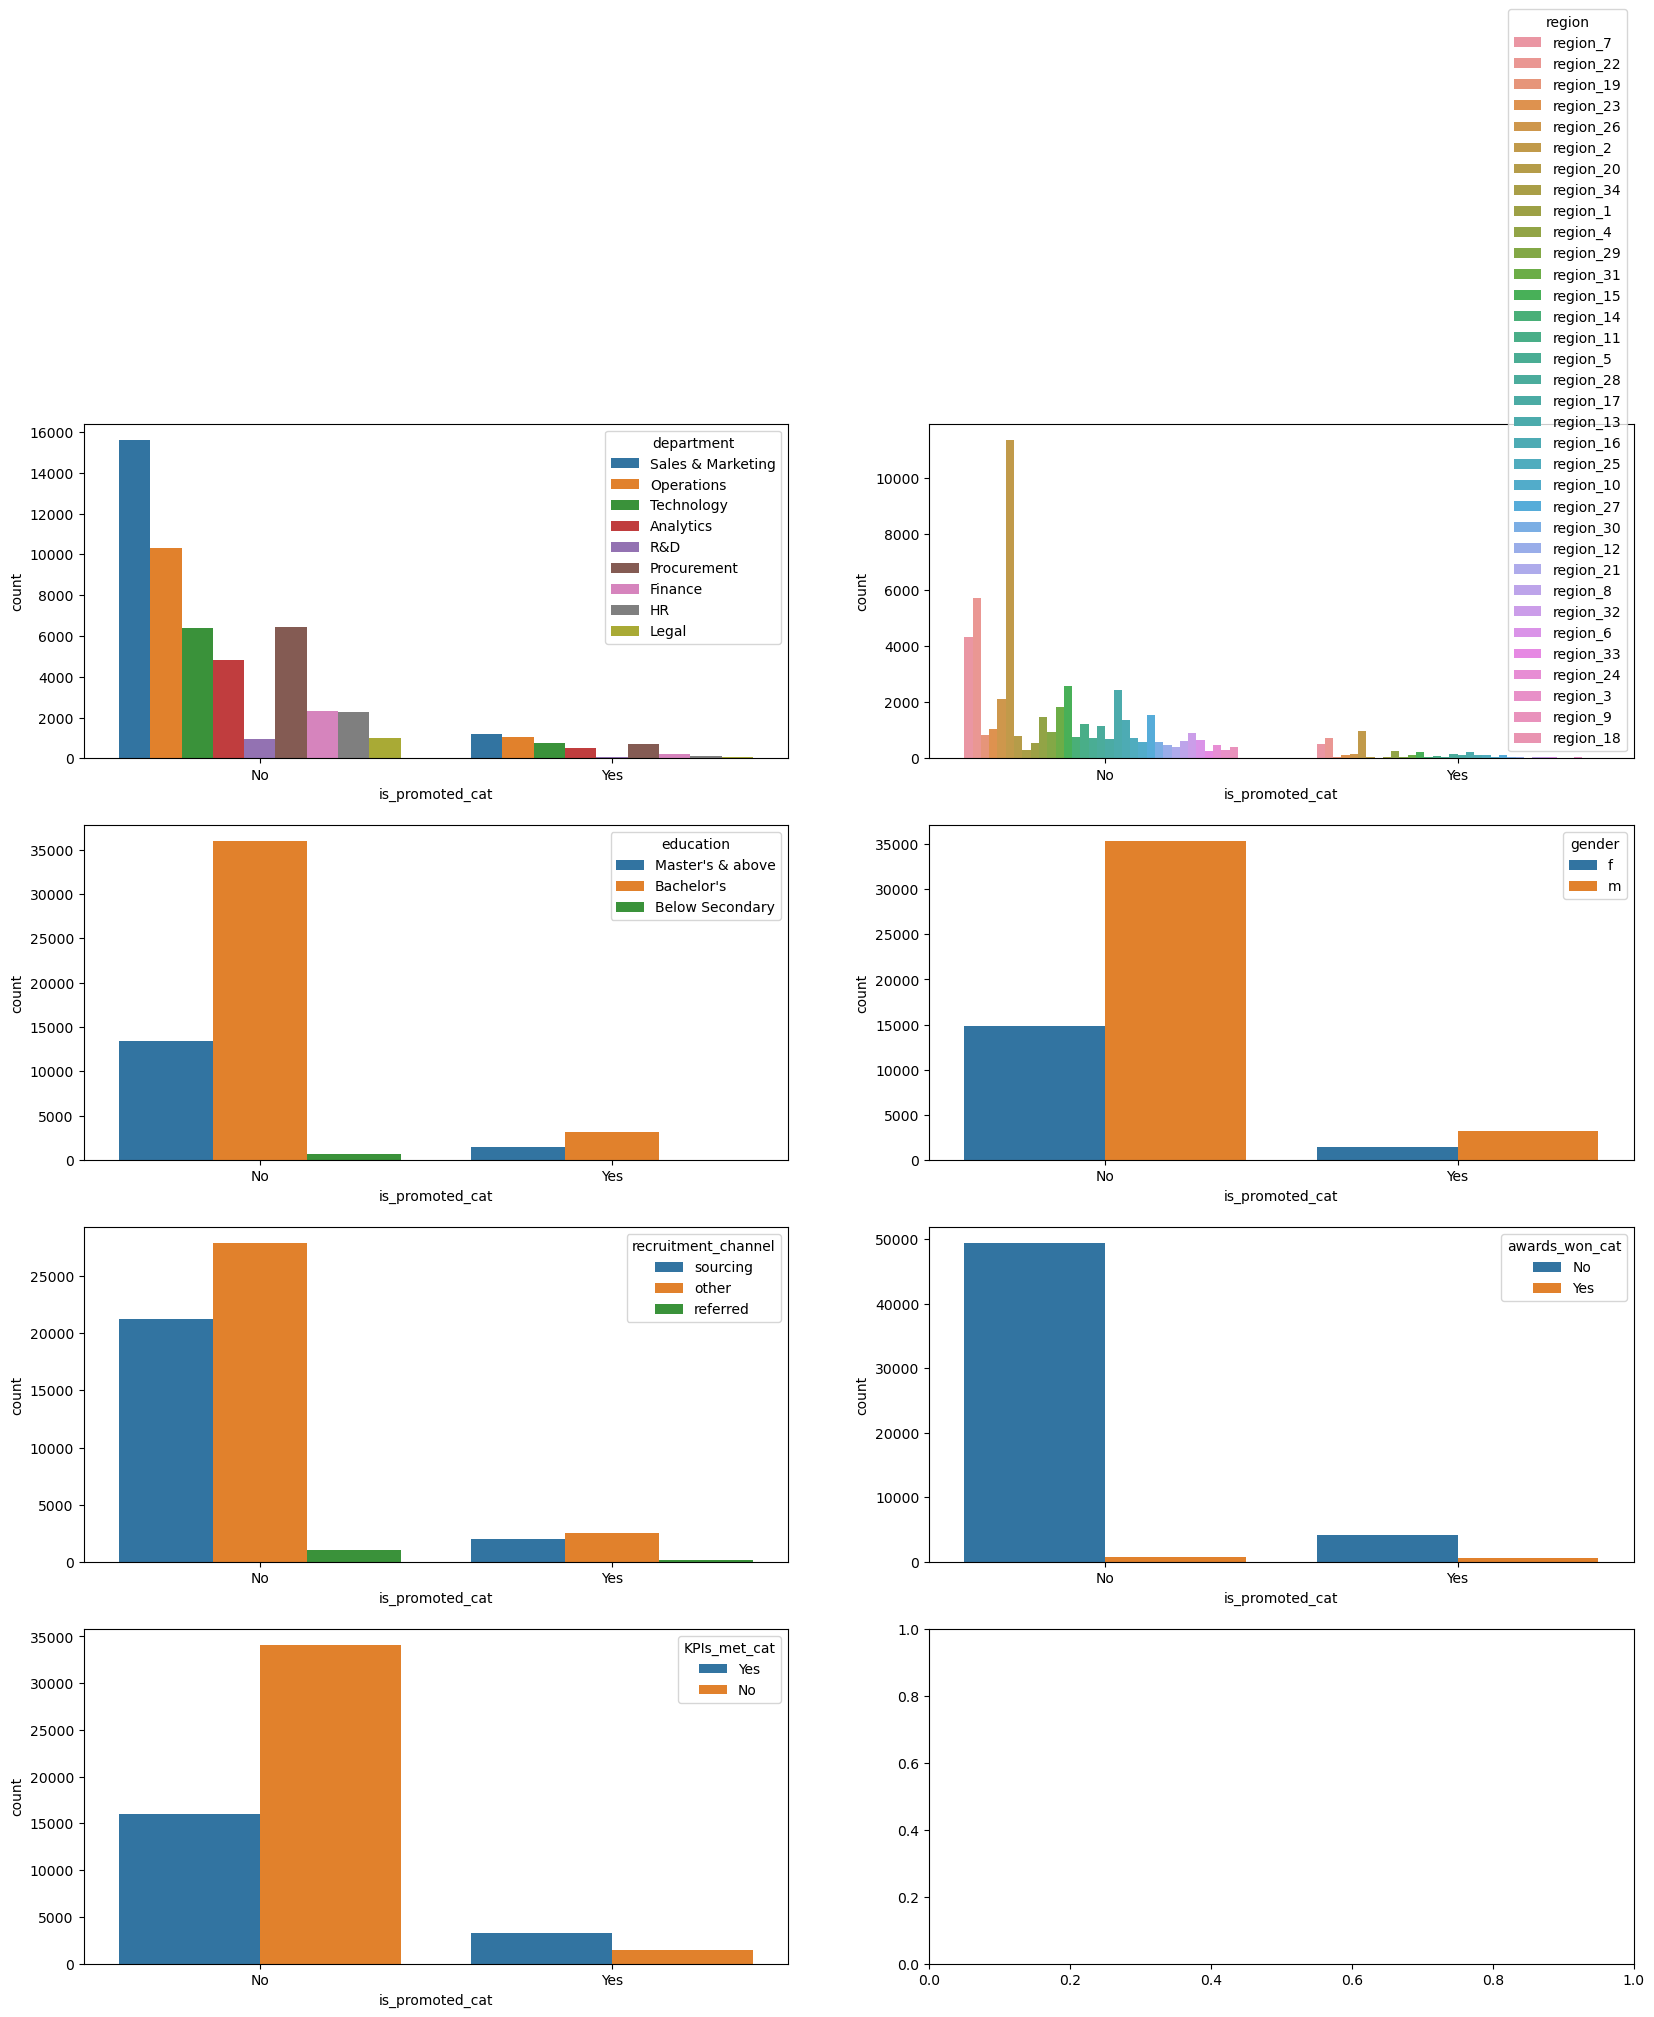

In [20]:
## Cat Vs Cat
fig,ax = plt.subplots(4,2,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=target,hue=x,ax=axi,data=hr_df)

## 9.2 Num vs Num

### Scatter Plots for corelation b/w numerical variables

In [21]:
num_cols1 = hr_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'avg_training_score']

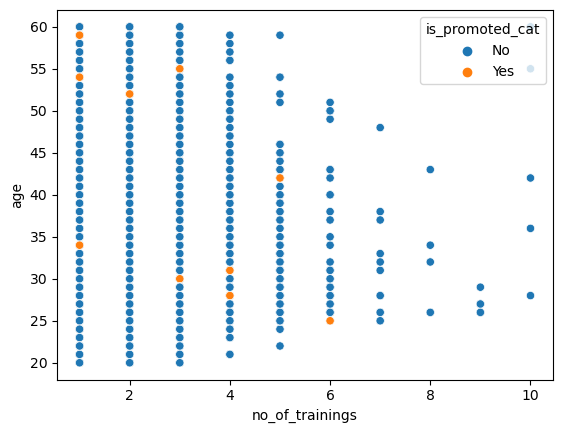

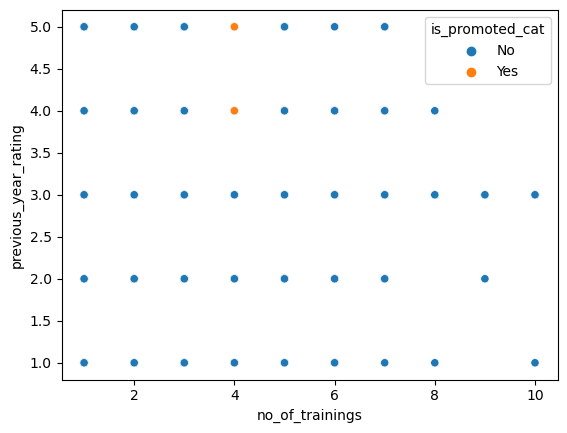

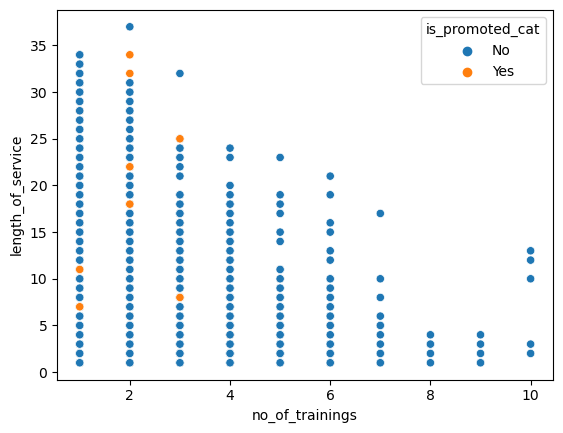

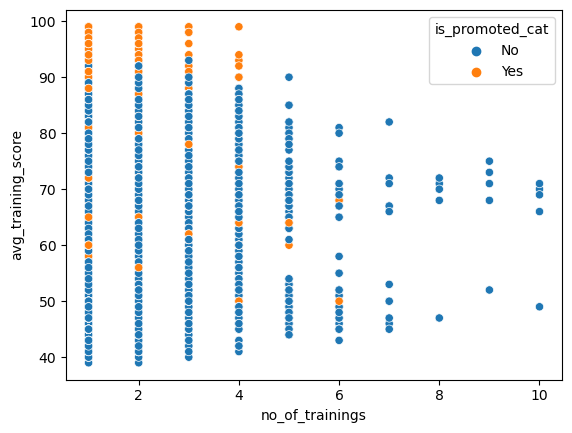

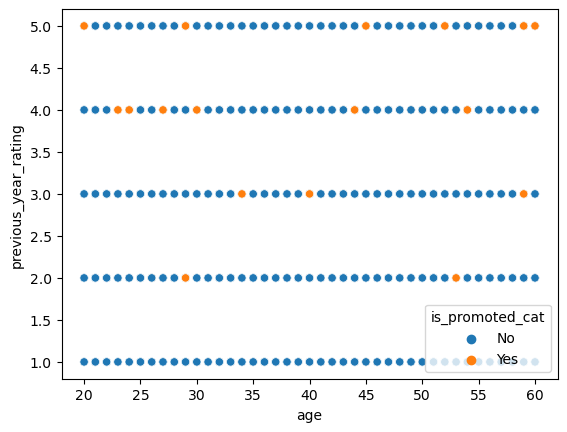

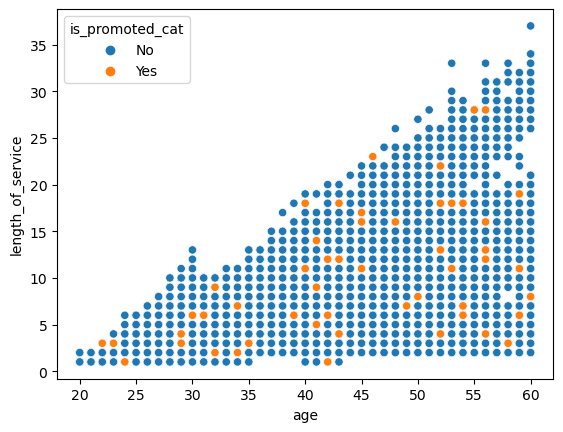

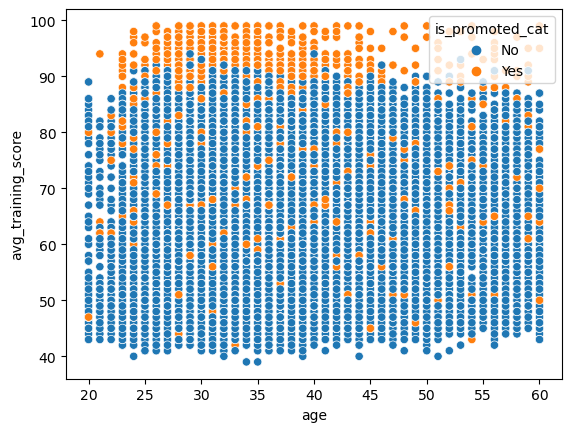

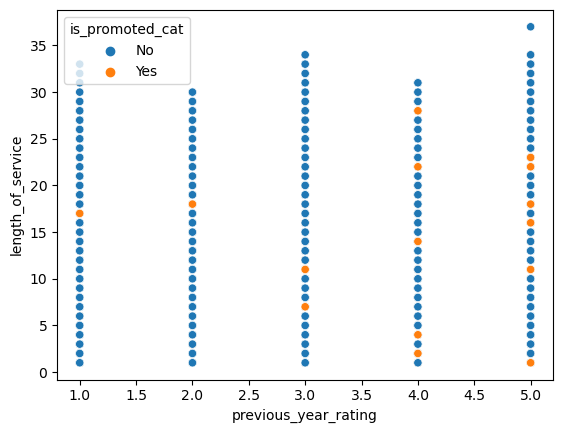

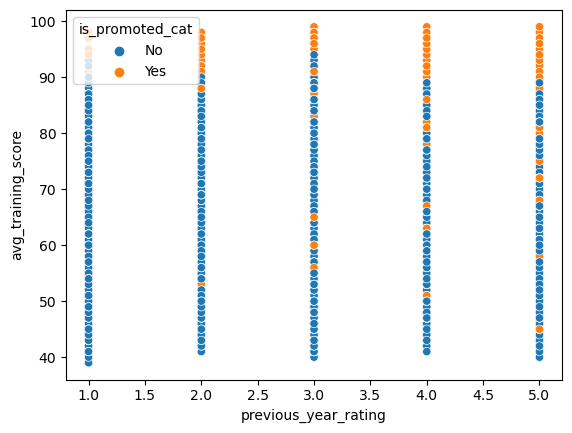

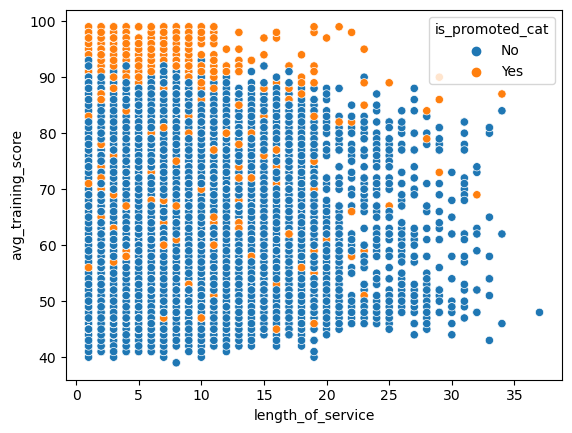

In [22]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue=target,data=hr_df)
            plt.show()
    num_cols2.pop(0)
    

<Axes: >

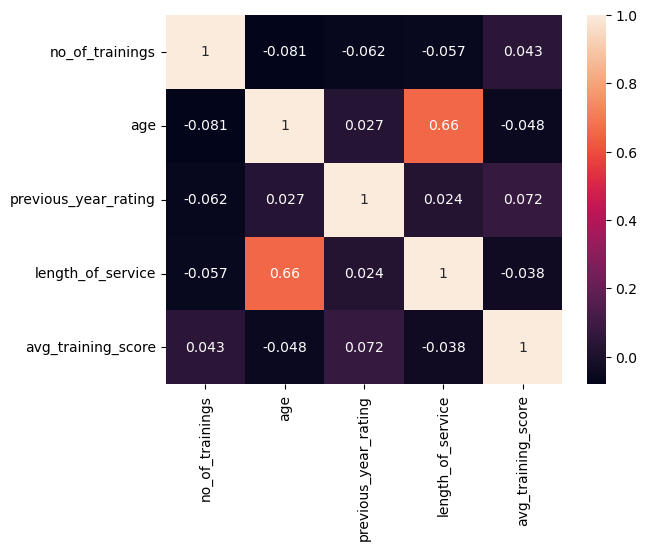

In [23]:
corr_mat=hr_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)

In [24]:
hr_df.select_dtypes(exclude="object").columns
print(hr_df.select_dtypes(exclude="object").columns)
output_var=target

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score'],
      dtype='object')


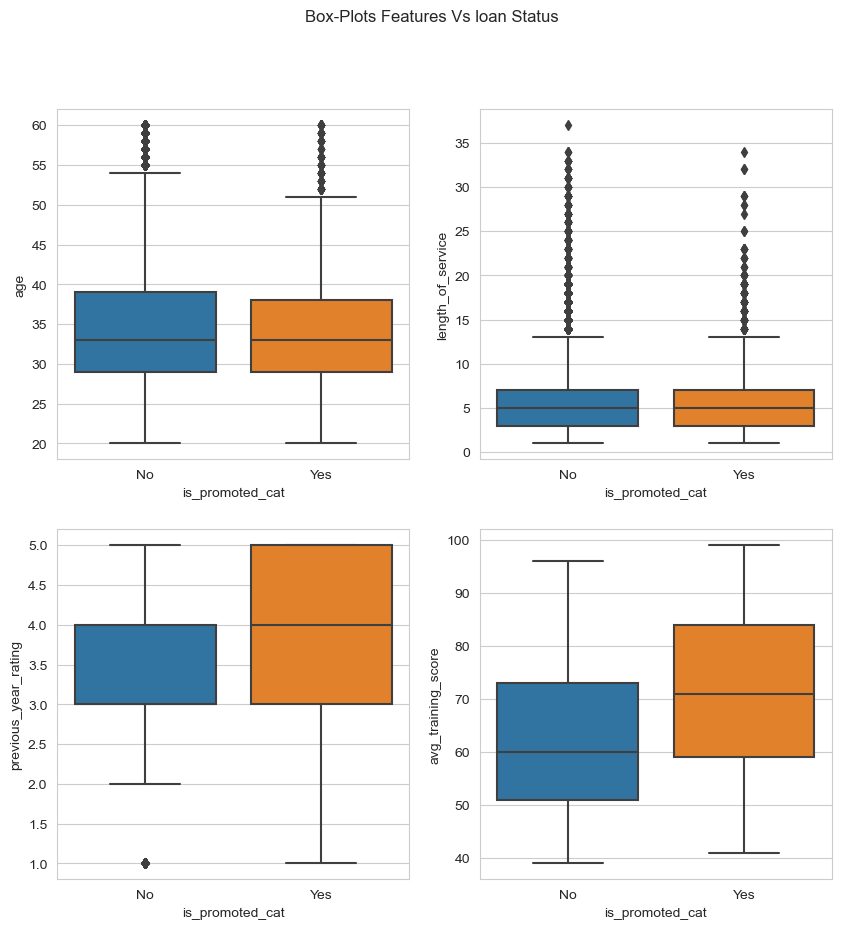

In [25]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0, 0], x=output_var, y='age', data=hr_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='length_of_service', data=hr_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='previous_year_rating', data=hr_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

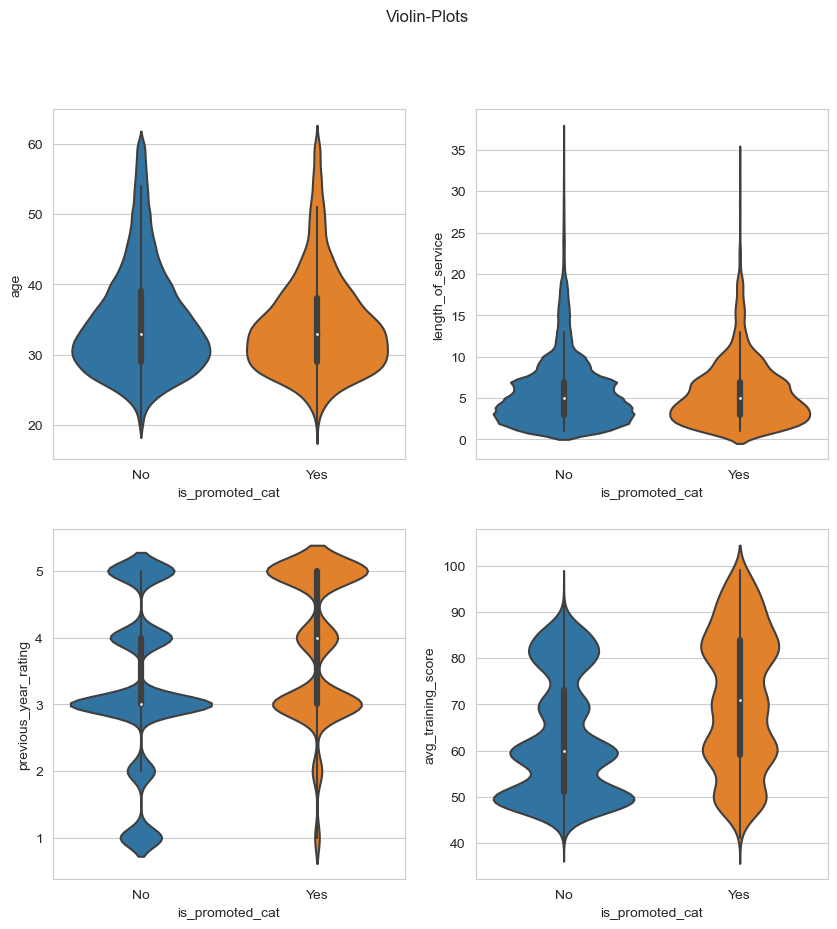

In [26]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0, 0], x=output_var, y='age', data=hr_df)
sns.violinplot(ax=axes[0, 1], x=output_var, y='length_of_service', data=hr_df)
sns.violinplot(ax=axes[1, 0], x=output_var, y='previous_year_rating', data=hr_df)
sns.violinplot(ax=axes[1, 1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

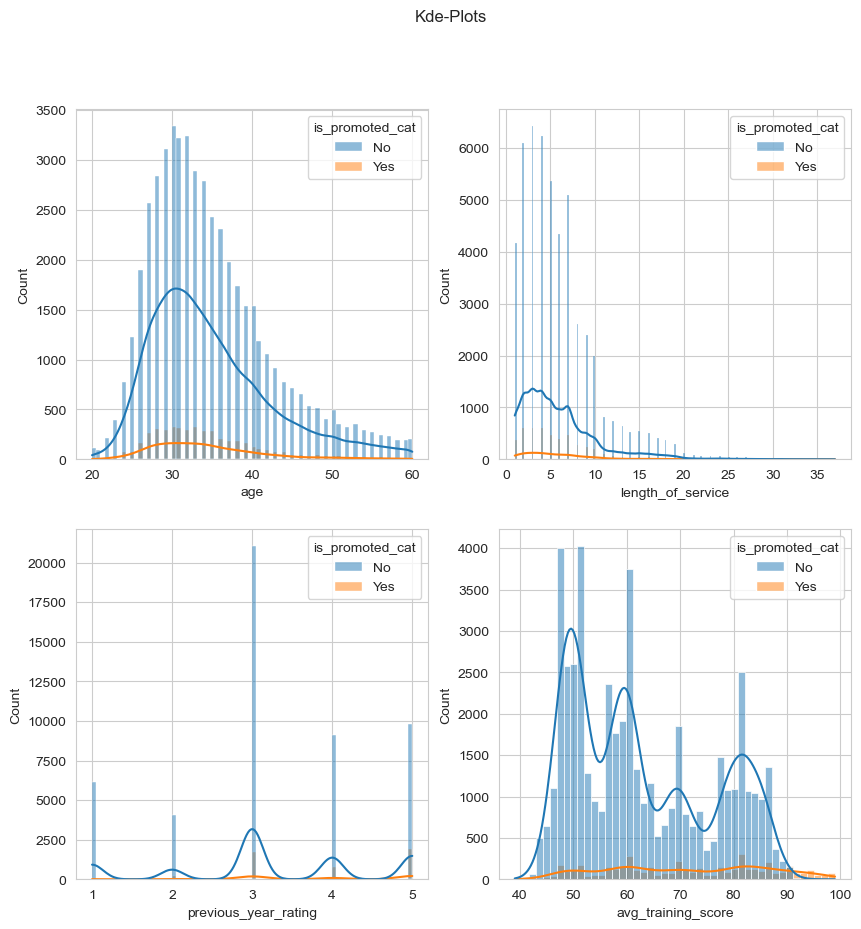

In [27]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='age', data=hr_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='length_of_service', data=hr_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='previous_year_rating', data=hr_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='avg_training_score', data=hr_df,kde=True)
plt.show()